# Titanic prediction using decision tree

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , f1_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns
import graphviz

### Read data

In [9]:
data = pd.read_csv('./data/titanic/titanic.csv')
# test_data = pd.read_csv('./data/titanic/test.csv')
print(data.head(2))
data.info()

   row.names pclass  survived                          name   age  \
0          1    1st         1  Allen, Miss Elisabeth Walton  29.0   
1          2    1st         0   Allison, Miss Helen Loraine   2.0   

      embarked                        home.dest room      ticket boat     sex  
0  Southampton                     St Louis, MO  B-5  24160 L221    2  female  
1  Southampton  Montreal, PQ / Chesterville, ON  C26         NaN  NaN  female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   

### Analyze data

<Axes: xlabel='survived', ylabel='count'>

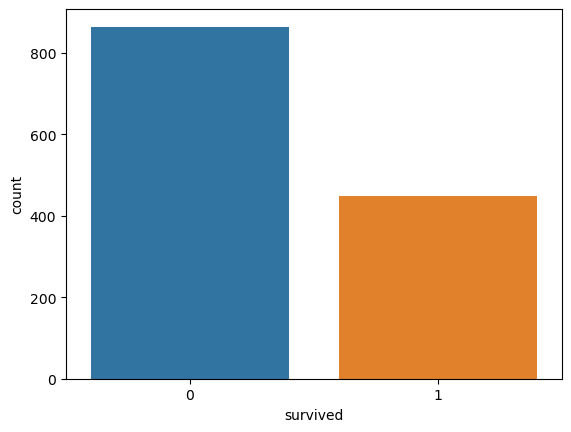

In [10]:
survived_info = data['survived'].value_counts(normalize=True)
sns.countplot(data, x='survived')

<Axes: xlabel='pclass', ylabel='count'>

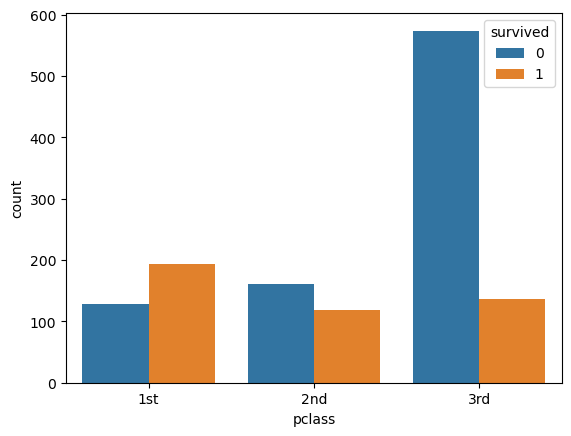

In [11]:
sns.countplot(data, x='pclass', hue='survived')

In [12]:
data[['embarked', 'survived']].groupby(['embarked']).mean()
data['survived'].groupby(pd.qcut(data['age'], 5)).mean()

age
(0.166, 19.0]    0.578125
(19.0, 26.0]     0.354610
(26.0, 33.0]     0.400000
(33.0, 45.0]     0.447761
(45.0, 71.0]     0.443478
Name: survived, dtype: float64

In [13]:
data[['survived','sex']].groupby(['sex']).mean()


,survived
sex,
female,0.663067
male,0.167059


In [14]:
data['sex'].value_counts(normalize=True)

sex
male      0.647372
female    0.352628
Name: proportion, dtype: float64

<Axes: xlabel='embarked', ylabel='count'>

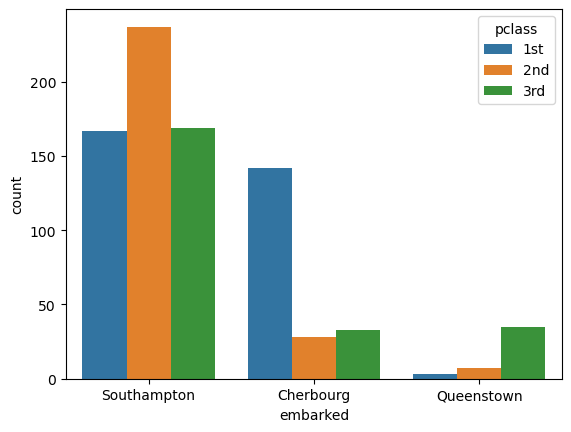

In [15]:
sns.countplot(data, x='embarked', hue='pclass')

### Pre-process data

In [16]:
drop_columns=['home.dest','room','ticket','boat', 'row.names', 'name']
keep_columns = ['pclass', 'survived', 'age', 'embarked', 'sex']
# data = data.drop(columns=drop_columns, axis=1, errors='ignore')
data = data[keep_columns]
# data = data[data.columns[data.columns.isin(keep_columns)]]
data.head()

,pclass,survived,age,embarked,sex
0,1st,1,29.0000,Southampton,female
1,1st,0,2.0000,Southampton,female
2,1st,0,30.0000,Southampton,male
3,1st,0,25.0000,Southampton,female
4,1st,1,0.9167,Southampton,male


In [17]:
def age(data):
    data['age'] = data['age'].fillna(data['age'].mean())
    return data
    
# data['age'].isnull().values.ravel().sum()
    
def embark(data):
    data['embarked'] = data['embarked'].fillna('Southampton') 
    return data
# data['age'].mean()
# pclass column to pclass_val1,pclass_val2 
def dummies(data, columns=['pclass','embarked', 'sex']):
    for col in columns:
        data[col] = data[col].apply(lambda x: str(x))
        new_cols = [col + '_' + i for i in data[col].unique()]
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)[new_cols]], axis=1)
        del data[col]
    return data

In [22]:
data1 = pd.DataFrame(data)
# data2 = pd.DataFrame(data)
data1 = age(data1)
data1 = embark(data1)
data1 = dummies(data1)
data1.head()

,survived,age,pclass_1st,pclass_2nd,pclass_3rd,embarked_Southampton,embarked_Cherbourg,embarked_Queenstown,sex_female,sex_male
0,1,29.0000,True,False,False,True,False,False,True,False
1,0,2.0000,True,False,False,True,False,False,True,False
2,0,30.0000,True,False,False,True,False,False,False,True
3,0,25.0000,True,False,False,True,False,False,True,False
4,1,0.9167,True,False,False,True,False,False,False,True


### Train model

In [23]:
train_x, valid_x, train_y, valid_y = train_test_split(data1.iloc[:,1:], data1.iloc[:,0], test_size=0.2, random_state=0)
train_x.head()

,age,pclass_1st,pclass_2nd,pclass_3rd,embarked_Southampton,embarked_Cherbourg,embarked_Queenstown,sex_female,sex_male
1078,31.194181,False,False,True,True,False,False,False,True
1121,31.194181,False,False,True,True,False,False,False,True
772,65.000000,False,False,True,False,False,True,False,True
44,33.000000,True,False,False,True,False,False,False,True
1075,31.194181,False,False,True,True,False,False,False,True


In [20]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
model.fit(train_x, train_y)



NameError: name 'train_x' is not defined

### Evaluate model

In [ ]:
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(accuracy_score(y, y_pred)),"\n")
    
    if show_classification_report:
        print("Classification report")
        print(classification_report(y, y_pred), "\n")
    
    if show_confussion_matrix:
        print("Confusion matrix")
        print(confusion_matrix(y, y_pred), "\n")

In [ ]:
measure_performance(valid_x, valid_y, model)

Accuracy:0.840 

Classification report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       171
           1       0.95      0.58      0.72        92

    accuracy                           0.84       263
   macro avg       0.88      0.78      0.80       263
weighted avg       0.86      0.84      0.83       263
 

Confusion matrix
[[168   3]
 [ 39  53]] 



### visualize


In [19]:
visual_data = export_graphviz(model,feature_names=train_x.columns)
graph = graphviz,source(visual_data)

NameError: name 'model' is not defined


### Output

In [ ]:

# df = pd.DataFrame()
# df.to_csv('submission.csv',index = False, header=True)